In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from manify.manifolds import ProductManifold
from manify.curvature_estimation.delta_hyperbolicity import delta_hyperbolicity, sampled_delta_hyperbolicity
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def cosine_distance(X):
    # Normalize the vectors
    X_norm = X / torch.norm(X, dim=1, keepdim=True)
    # Compute cosine similarity
    similarity = torch.mm(X_norm, X_norm.t())
    # Convert to distance (1 - similarity)
    return 1 - similarity

## Sampling Multiple Manfifolds

Curvature -3 done
Curvature -2 done
Curvature -1 done
Curvature 0 done


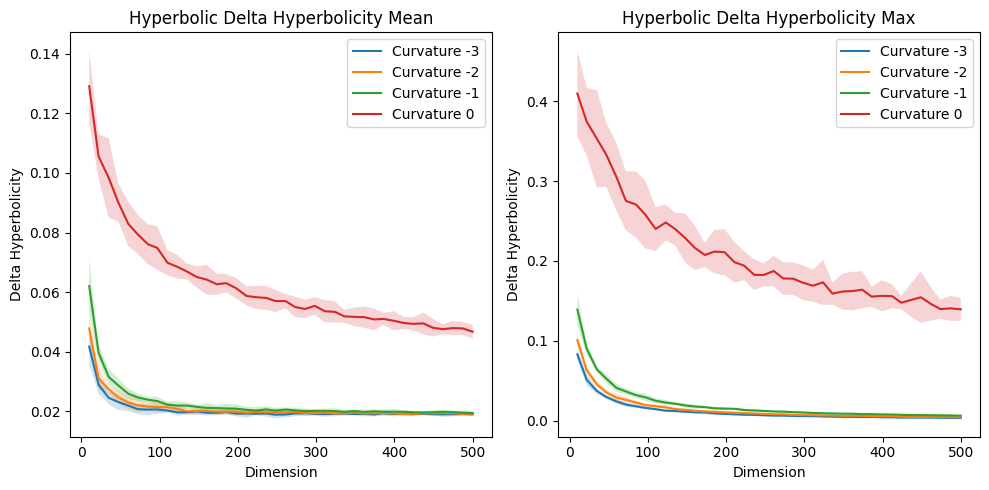

In [4]:
# Curvatures and Dimension in hyperbolic distance metrics
N = 100  # Number of points per sample
n_samples = 10  # Number of samples for confidence intervals

dims = np.linspace(10,500,40, dtype=int).tolist()
curvatures = [-3, -2, -1, 0]

# Initialize arrays to store all samples
delta_means_samples = [[] for _ in curvatures]
delta_maxes_samples = [[] for _ in curvatures]

for i,k in enumerate(curvatures):
    for dim in dims:
        # Store results for multiple samples
        sample_means = []
        sample_maxes = []
        
        for _ in range(n_samples):
            pm = ProductManifold(signature=[(k, dim)], device='cuda')
            X, _ = pm.sample(z_mean=torch.stack([pm.mu0] * N))
            dists = pm.pdist(X)
            delta = delta_hyperbolicity(dists)
            sample_means.append(torch.abs(delta).mean().item())
            sample_maxes.append(delta.max().item())
        
        # Calculate mean and std for confidence intervals
        delta_means_samples[i].append((np.mean(sample_means), np.std(sample_means)))
        delta_maxes_samples[i].append((np.mean(sample_maxes), np.std(sample_maxes)))
    print(f"Curvature {k} done")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i,k in enumerate(curvatures):
    # Extract means and stds
    means = [m[0] for m in delta_means_samples[i]]
    mean_stds = [m[1] for m in delta_means_samples[i]]
    maxes = [m[0] for m in delta_maxes_samples[i]]
    max_stds = [m[1] for m in delta_maxes_samples[i]]
    
    # Plot means with confidence intervals
    axs[0].plot(dims, means, label=f'Curvature {k}')
    axs[0].fill_between(dims, 
                       [m - 1.96*s for m,s in zip(means, mean_stds)],
                       [m + 1.96*s for m,s in zip(means, mean_stds)],
                       alpha=0.2)
    
    # Plot maxes with confidence intervals
    axs[1].plot(dims, maxes, label=f'Curvature {k}')
    axs[1].fill_between(dims,
                       [m - 1.96*s for m,s in zip(maxes, max_stds)],
                       [m + 1.96*s for m,s in zip(maxes, max_stds)],
                       alpha=0.2)

axs[0].legend()
axs[0].set_xlabel('Dimension')
axs[0].set_ylabel('Delta Hyperbolicity')
axs[0].set_title('Hyperbolic Delta Hyperbolicity Mean')
axs[1].legend()
axs[1].set_xlabel('Dimension')
axs[1].set_ylabel('Delta Hyperbolicity')
axs[1].set_title('Hyperbolic Delta Hyperbolicity Max')

plt.tight_layout()
plt.show() 

Curvature -3 done
Curvature -2 done
Curvature -1 done
Curvature 0 done


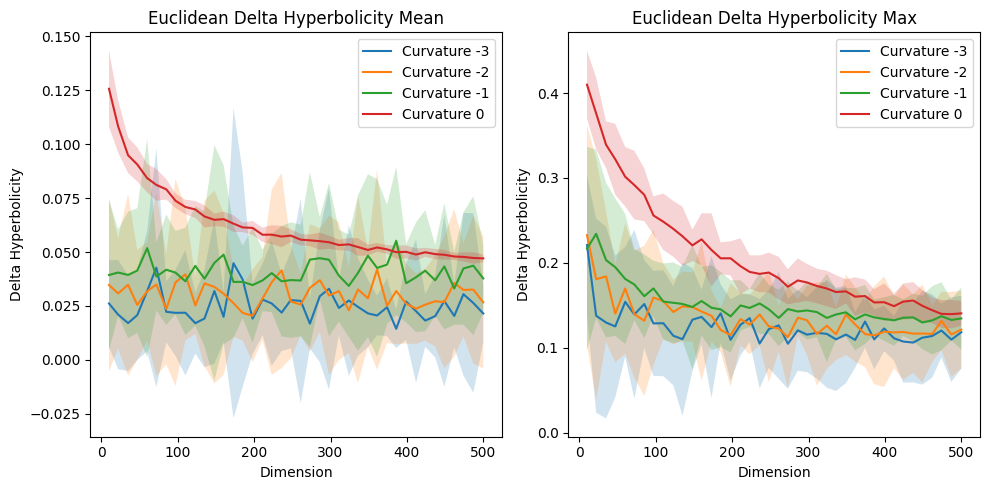

In [5]:
# Curvatures and Dimension in Euclidean distance metrics
N = 100  # Number of points per sample
n_samples = 10  # Number of samples for confidence intervals

dims = np.linspace(10,500,40, dtype=int).tolist()
curvatures = [-3, -2, -1, 0]

# Initialize arrays to store all samples
delta_means_samples = [[] for _ in curvatures]
delta_maxes_samples = [[] for _ in curvatures]

for i,k in enumerate(curvatures):
    for dim in dims:
        # Store results for multiple samples
        sample_means = []
        sample_maxes = []
        
        for _ in range(n_samples):
            pm = ProductManifold(signature=[(k, dim)], device='cuda')
            X, _ = pm.sample(z_mean=torch.stack([pm.mu0] * N))
            dists = torch.cdist(X, X)
            delta = delta_hyperbolicity(dists)
            sample_means.append(torch.abs(delta).mean().item())
            sample_maxes.append(delta.max().item())
        
        # Calculate mean and std for confidence intervals
        delta_means_samples[i].append((np.mean(sample_means), np.std(sample_means)))
        delta_maxes_samples[i].append((np.mean(sample_maxes), np.std(sample_maxes)))
    print(f"Curvature {k} done")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i,k in enumerate(curvatures):
    # Extract means and stds
    means = [m[0] for m in delta_means_samples[i]]
    mean_stds = [m[1] for m in delta_means_samples[i]]
    maxes = [m[0] for m in delta_maxes_samples[i]]
    max_stds = [m[1] for m in delta_maxes_samples[i]]
    
    # Plot means with confidence intervals
    axs[0].plot(dims, means, label=f'Curvature {k}')
    axs[0].fill_between(dims, 
                       [m - 1.96*s for m,s in zip(means, mean_stds)],
                       [m + 1.96*s for m,s in zip(means, mean_stds)],
                       alpha=0.2)
    
    # Plot maxes with confidence intervals
    axs[1].plot(dims, maxes, label=f'Curvature {k}')
    axs[1].fill_between(dims,
                       [m - 1.96*s for m,s in zip(maxes, max_stds)],
                       [m + 1.96*s for m,s in zip(maxes, max_stds)],
                       alpha=0.2)

axs[0].legend()
axs[0].set_xlabel('Dimension')
axs[0].set_ylabel('Delta Hyperbolicity')
axs[0].set_title('Euclidean Delta Hyperbolicity Mean')
axs[1].legend()
axs[1].set_xlabel('Dimension')
axs[1].set_ylabel('Delta Hyperbolicity')
axs[1].set_title('Euclidean Delta Hyperbolicity Max')

plt.tight_layout()
plt.show() 

Curvature -3 done
Curvature -2 done
Curvature -1 done
Curvature 0 done


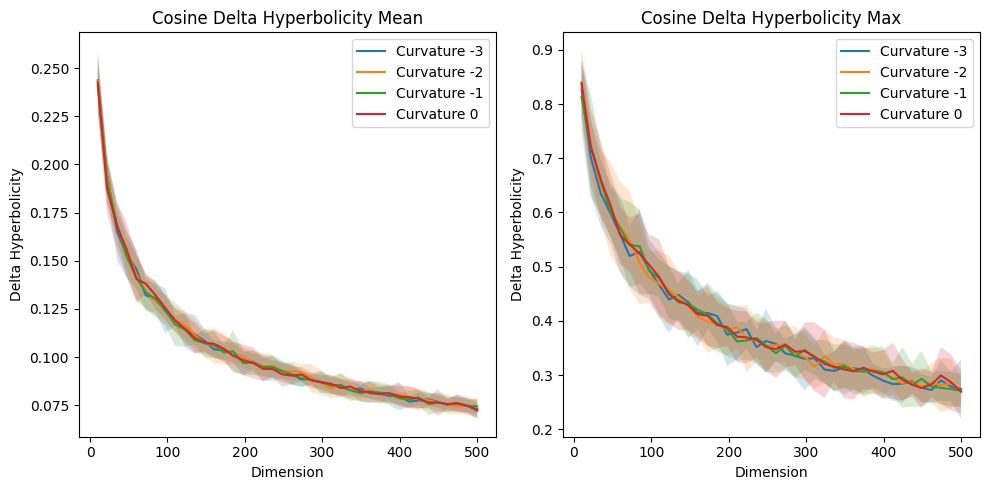

In [6]:
# Curvatures and Dimension in Cosine distance metrics
N = 100  # Number of points per sample
n_samples = 10  # Number of samples for confidence intervals

dims = np.linspace(10,500,40, dtype=int).tolist()
curvatures = [-3, -2, -1, 0]

# Initialize arrays to store all samples
delta_means_samples = [[] for _ in curvatures]
delta_maxes_samples = [[] for _ in curvatures]

for i,k in enumerate(curvatures):
    for dim in dims:
        # Store results for multiple samples
        sample_means = []
        sample_maxes = []
        
        for _ in range(n_samples):
            pm = ProductManifold(signature=[(k, dim)], device='cuda')
            X, _ = pm.sample(z_mean=torch.stack([pm.mu0] * N))
            dists = cosine_distance(X)
            delta = delta_hyperbolicity(dists)
            sample_means.append(torch.abs(delta).mean().item())
            sample_maxes.append(delta.max().item())
        
        # Calculate mean and std for confidence intervals
        delta_means_samples[i].append((np.mean(sample_means), np.std(sample_means)))
        delta_maxes_samples[i].append((np.mean(sample_maxes), np.std(sample_maxes)))
    print(f"Curvature {k} done")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i,k in enumerate(curvatures):
    # Extract means and stds
    means = [m[0] for m in delta_means_samples[i]]
    mean_stds = [m[1] for m in delta_means_samples[i]]
    maxes = [m[0] for m in delta_maxes_samples[i]]
    max_stds = [m[1] for m in delta_maxes_samples[i]]
    
    # Plot means with confidence intervals
    axs[0].plot(dims, means, label=f'Curvature {k}')
    axs[0].fill_between(dims, 
                       [m - 1.96*s for m,s in zip(means, mean_stds)],
                       [m + 1.96*s for m,s in zip(means, mean_stds)],
                       alpha=0.2)
    
    # Plot maxes with confidence intervals
    axs[1].plot(dims, maxes, label=f'Curvature {k}')
    axs[1].fill_between(dims,
                       [m - 1.96*s for m,s in zip(maxes, max_stds)],
                       [m + 1.96*s for m,s in zip(maxes, max_stds)],
                       alpha=0.2)

axs[0].legend()
axs[0].set_xlabel('Dimension')
axs[0].set_ylabel('Delta Hyperbolicity')
axs[0].set_title('Cosine Delta Hyperbolicity Mean')
axs[1].legend()
axs[1].set_xlabel('Dimension')
axs[1].set_ylabel('Delta Hyperbolicity')
axs[1].set_title('Cosine Delta Hyperbolicity Max')

plt.tight_layout()
plt.show() 

Curvature -3 done
Curvature -2 done
Curvature -1 done
Curvature 0 done


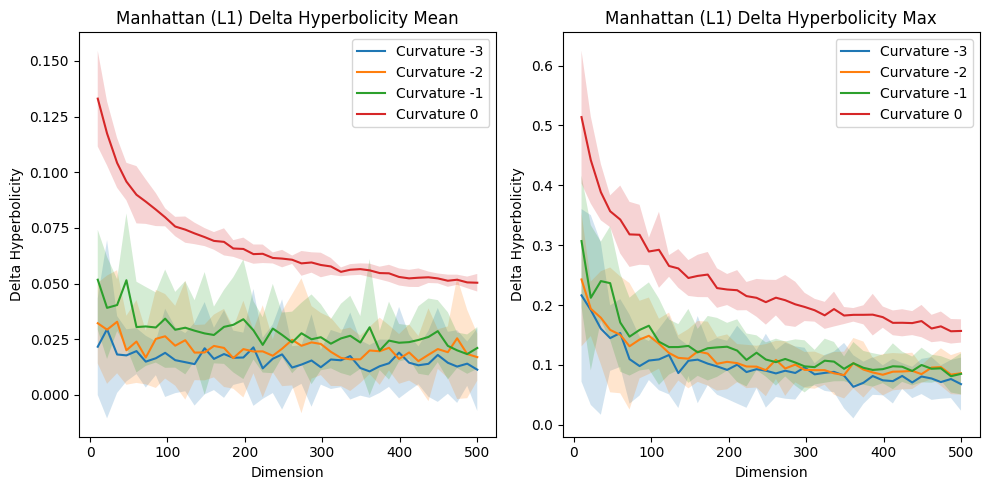

In [8]:
# Curvatures and Dimension in Manhattan (L1) distance metrics

LPs = [1, 2, 8, float('inf')]

N = 100  # Number of points per sample
n_samples = 10  # Number of samples for confidence intervals

dims = np.linspace(10,500,40, dtype=int).tolist()
curvatures = [-3, -2, -1, 0]

# Initialize arrays to store all samples
delta_means_samples = [[] for _ in curvatures]
delta_maxes_samples = [[] for _ in curvatures]

for i,k in enumerate(curvatures):
    for dim in dims:
        # Store results for multiple samples
        sample_means = []
        sample_maxes = []
        
        for _ in range(n_samples):
            pm = ProductManifold(signature=[(k, dim)], device='cuda')
            X, _ = pm.sample(z_mean=torch.stack([pm.mu0] * N))
            dists = torch.cdist(X, X, p=1)
            delta = delta_hyperbolicity(dists)
            sample_means.append(torch.abs(delta).mean().item())
            sample_maxes.append(delta.max().item())
        
        # Calculate mean and std for confidence intervals
        delta_means_samples[i].append((np.mean(sample_means), np.std(sample_means)))
        delta_maxes_samples[i].append((np.mean(sample_maxes), np.std(sample_maxes)))
    print(f"Curvature {k} done")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i,k in enumerate(curvatures):
    # Extract means and stds
    means = [m[0] for m in delta_means_samples[i]]
    mean_stds = [m[1] for m in delta_means_samples[i]]
    maxes = [m[0] for m in delta_maxes_samples[i]]
    max_stds = [m[1] for m in delta_maxes_samples[i]]
    
    # Plot means with confidence intervals
    axs[0].plot(dims, means, label=f'Curvature {k}')
    axs[0].fill_between(dims, 
                       [m - 1.96*s for m,s in zip(means, mean_stds)],
                       [m + 1.96*s for m,s in zip(means, mean_stds)],
                       alpha=0.2)
    
    # Plot maxes with confidence intervals
    axs[1].plot(dims, maxes, label=f'Curvature {k}')
    axs[1].fill_between(dims,
                       [m - 1.96*s for m,s in zip(maxes, max_stds)],
                       [m + 1.96*s for m,s in zip(maxes, max_stds)],
                       alpha=0.2)

axs[0].legend()
axs[0].set_xlabel('Dimension')
axs[0].set_ylabel('Delta Hyperbolicity')
axs[0].set_title('Manhattan (L1) Delta Hyperbolicity Mean')
axs[1].legend()
axs[1].set_xlabel('Dimension')
axs[1].set_ylabel('Delta Hyperbolicity')
axs[1].set_title('Manhattan (L1) Delta Hyperbolicity Max')

plt.tight_layout()
plt.show() 

Curvature -3 done for LP=1
Curvature -2 done for LP=1
Curvature -1 done for LP=1
Curvature 0 done for LP=1
Curvature -3 done for LP=2
Curvature -2 done for LP=2
Curvature -1 done for LP=2
Curvature 0 done for LP=2
Curvature -3 done for LP=4
Curvature -2 done for LP=4
Curvature -1 done for LP=4
Curvature 0 done for LP=4
Curvature -3 done for LP=inf
Curvature -2 done for LP=inf
Curvature -1 done for LP=inf
Curvature 0 done for LP=inf


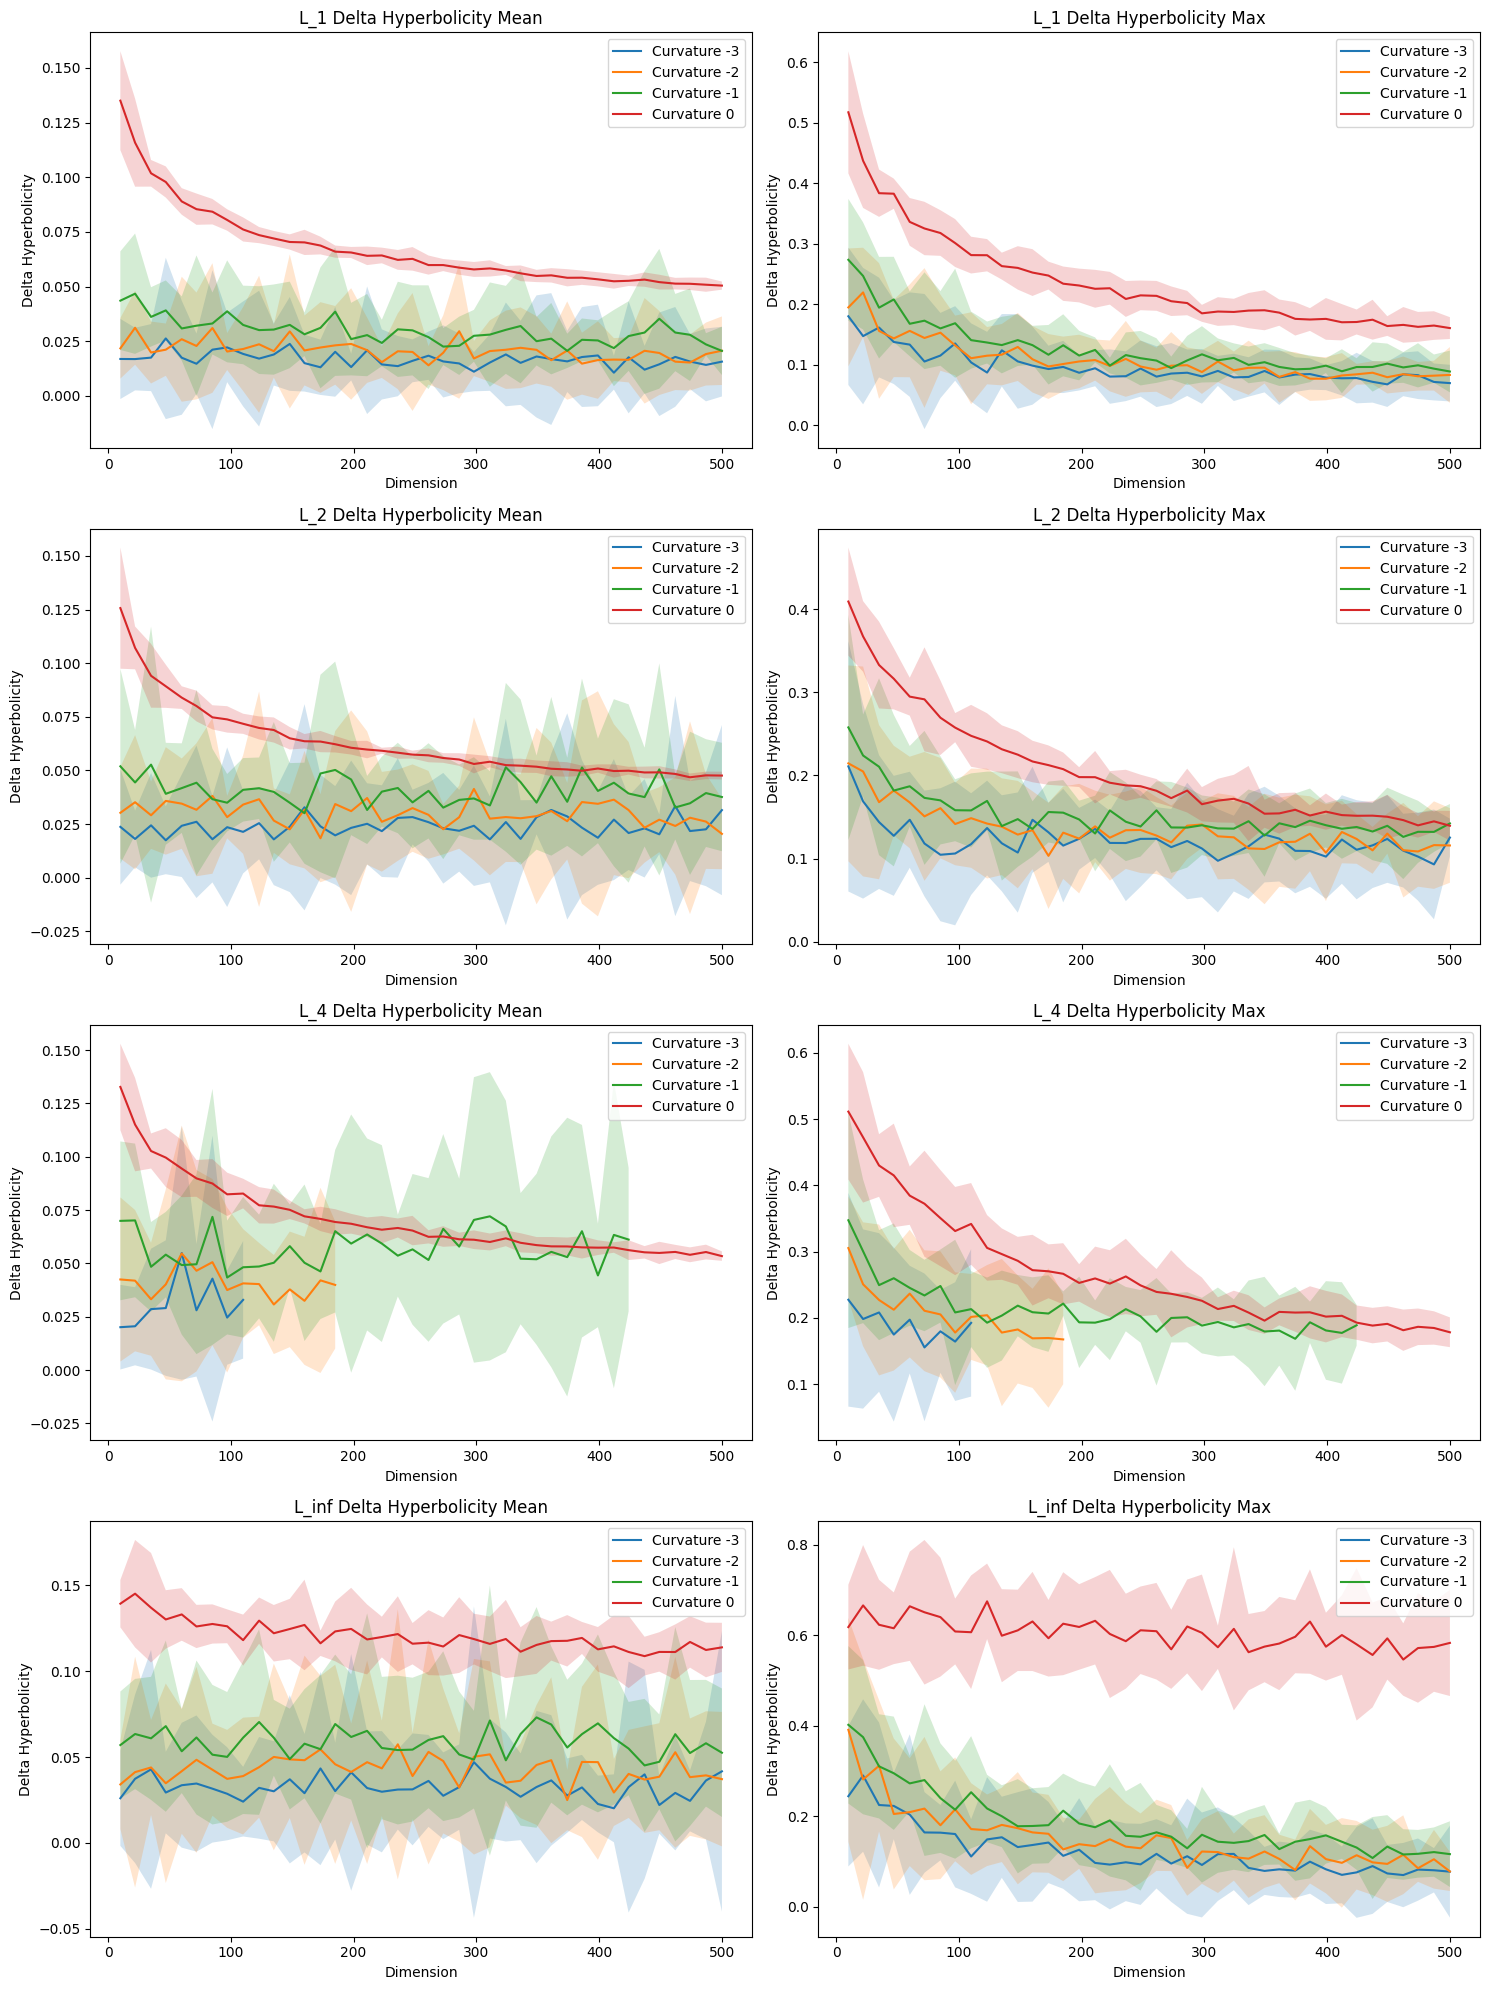

In [9]:
# Parameters
LPs = [1, 2, 4, float('inf')]  # Different LP norms to test
dims = np.linspace(10, 500, 40, dtype=int).tolist()
curvatures = [-3, -2, -1, 0]
n_samples = 10  # Number of samples for confidence intervals
N = 100  # Number of points per sample

# Create a figure with subplots for each LP norm
fig, axs = plt.subplots(len(LPs), 2, figsize=(15, 5*len(LPs)))

for lp_idx, LP in enumerate(LPs):
    # Initialize arrays to store all samples
    delta_means_samples = [[] for _ in curvatures]
    delta_maxes_samples = [[] for _ in curvatures]

    for i, k in enumerate(curvatures):
        for dim in dims:
            # Store results for multiple samples
            sample_means = []
            sample_maxes = []
            
            for _ in range(n_samples):
                pm = ProductManifold(signature=[(k, dim)], device='cuda')
                X, _ = pm.sample(z_mean=torch.stack([pm.mu0] * N))
                dists = torch.cdist(X, X, p=LP)
                delta = delta_hyperbolicity(dists)
                sample_means.append(torch.abs(delta).mean().item())
                sample_maxes.append(delta.max().item())
            
            # Calculate mean and std for confidence intervals
            delta_means_samples[i].append((np.mean(sample_means), np.std(sample_means)))
            delta_maxes_samples[i].append((np.mean(sample_maxes), np.std(sample_maxes)))
        print(f"Curvature {k} done for LP={LP}")

    # Plot for this LP norm
    for i, k in enumerate(curvatures):
        # Extract means and stds
        means = [m[0] for m in delta_means_samples[i]]
        mean_stds = [m[1] for m in delta_means_samples[i]]
        maxes = [m[0] for m in delta_maxes_samples[i]]
        max_stds = [m[1] for m in delta_maxes_samples[i]]
        
        # Plot means with confidence intervals
        axs[lp_idx, 0].plot(dims, means, label=f'Curvature {k}')
        axs[lp_idx, 0].fill_between(dims, 
                                   [m - 1.96*s for m,s in zip(means, mean_stds)],
                                   [m + 1.96*s for m,s in zip(means, mean_stds)],
                                   alpha=0.2)
        
        # Plot maxes with confidence intervals
        axs[lp_idx, 1].plot(dims, maxes, label=f'Curvature {k}')
        axs[lp_idx, 1].fill_between(dims,
                                   [m - 1.96*s for m,s in zip(maxes, max_stds)],
                                   [m + 1.96*s for m,s in zip(maxes, max_stds)],
                                   alpha=0.2)

    # Set labels and titles for this LP norm
    axs[lp_idx, 0].legend()
    axs[lp_idx, 0].set_xlabel('Dimension')
    axs[lp_idx, 0].set_ylabel('Delta Hyperbolicity')
    axs[lp_idx, 0].set_title(f'L_{LP} Delta Hyperbolicity Mean')
    
    axs[lp_idx, 1].legend()
    axs[lp_idx, 1].set_xlabel('Dimension')
    axs[lp_idx, 1].set_ylabel('Delta Hyperbolicity')
    axs[lp_idx, 1].set_title(f'L_{LP} Delta Hyperbolicity Max')

plt.tight_layout()
plt.show() 

## Expmapping the Same Point

Curvature -3 done
Curvature -2 done
Curvature -1 done
Curvature 0 done


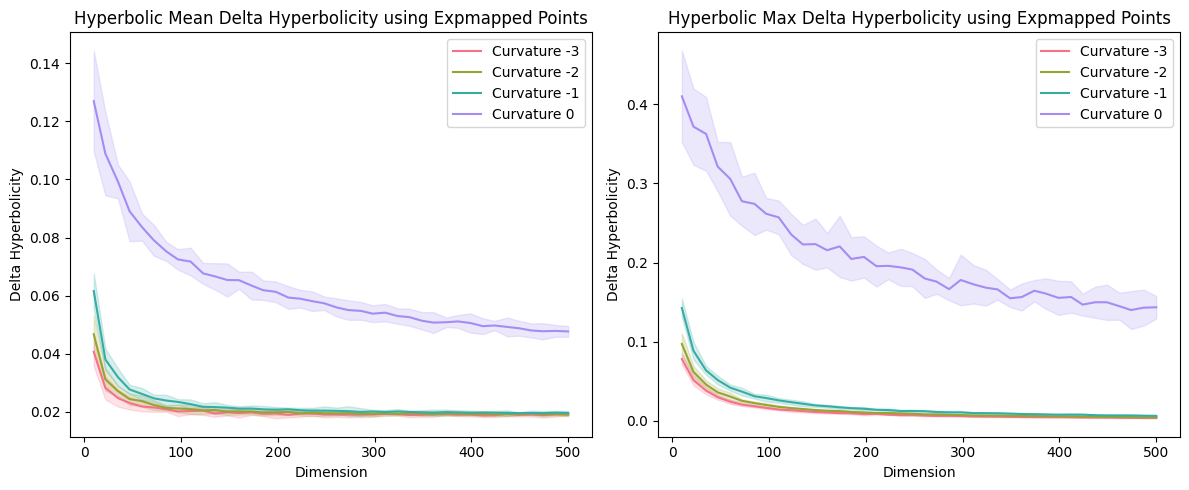

In [ ]:

# Parameters
dims = np.linspace(10, 500, 40, dtype=int).tolist()
curvatures = [-3, -2, -1, 0]
n_samples = 10  # Number of samples for confidence intervals
N_POINTS = 100  # Number of points to generate for each sample

# Initialize arrays to store results
delta_means_samples = [[] for _ in curvatures]
delta_maxes_samples = [[] for _ in curvatures]

for i, k in enumerate(curvatures):
    for dim in dims:
        # Store results for multiple samples
        sample_means = []
        sample_maxes = []
        
        for _ in range(n_samples):
            # Create a single point in tangent space
            N = torch.distributions.MultivariateNormal(
                loc=torch.zeros(dim), 
                covariance_matrix=torch.eye(dim)
            )
            x = N.sample(sample_shape=(N_POINTS,))
            x_tangent = torch.hstack([torch.zeros(N_POINTS, 1), x])
            
            # Create manifold and compute distances
            pm = ProductManifold(signature=[(k, dim)])
            X = pm.expmap(x_tangent).to('cuda')
            dists = pm.pdist(X)
            delta = delta_hyperbolicity(dists)
            
            sample_means.append(torch.abs(delta).mean().item())
            sample_maxes.append(delta.max().item())
        
        # Calculate mean and std for confidence intervals
        delta_means_samples[i].append((np.mean(sample_means), np.std(sample_means)))
        delta_maxes_samples[i].append((np.mean(sample_maxes), np.std(sample_maxes)))
    print(f"Curvature {k} done")

# Create the plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

colors = sns.color_palette("husl", len(curvatures))

for i, k in enumerate(curvatures):
    # Extract means and stds
    means = [m[0] for m in delta_means_samples[i]]
    mean_stds = [m[1] for m in delta_means_samples[i]]
    maxes = [m[0] for m in delta_maxes_samples[i]]
    max_stds = [m[1] for m in delta_maxes_samples[i]]
    
    # Plot means with confidence intervals
    axs[0].plot(dims, means, label=f'Curvature {k}', color=colors[i])
    axs[0].fill_between(dims, 
                       [m - 1.96*s for m,s in zip(means, mean_stds)],
                       [m + 1.96*s for m,s in zip(means, mean_stds)],
                       alpha=0.2, color=colors[i])
    
    # Plot maxes with confidence intervals
    axs[1].plot(dims, maxes, label=f'Curvature {k}', color=colors[i])
    axs[1].fill_between(dims,
                       [m - 1.96*s for m,s in zip(maxes, max_stds)],
                       [m + 1.96*s for m,s in zip(maxes, max_stds)],
                       alpha=0.2, color=colors[i])

axs[0].legend()
axs[0].set_xlabel('Dimension')
axs[0].set_ylabel('Delta Hyperbolicity')
axs[0].set_title('Hyperbolic Mean Delta Hyperbolicity using Expmapped Points')
axs[1].legend()
axs[1].set_xlabel('Dimension')
axs[1].set_ylabel('Delta Hyperbolicity')
axs[1].set_title('Hyperbolic Max Delta Hyperbolicity using Expmapped Points')

plt.tight_layout()
plt.show() 

Curvature -3 done
Curvature -2 done
Curvature -1 done
Curvature 0 done


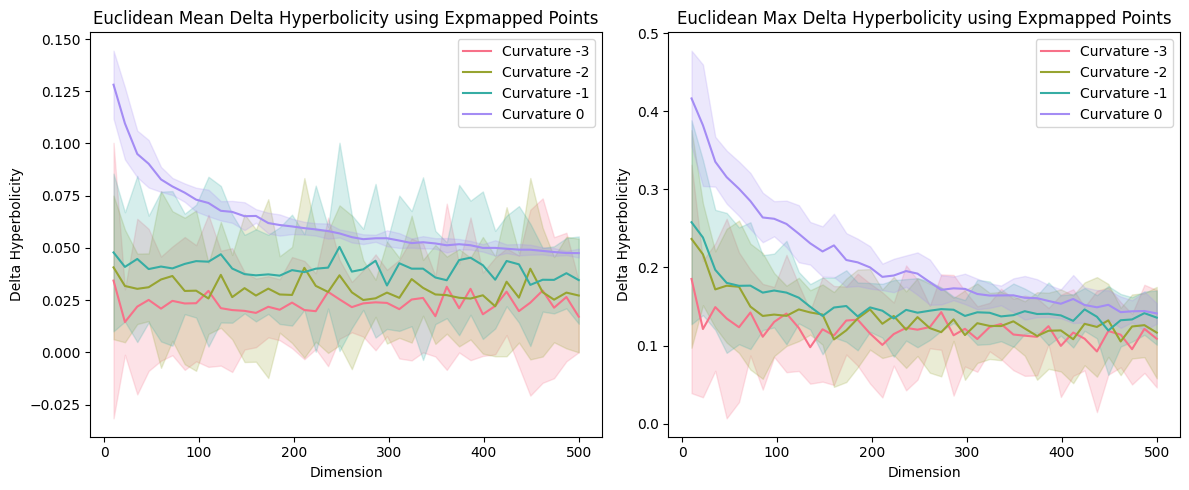

In [11]:
# Euclidean Distance Metrics

import seaborn as sns

# Parameters
dims = np.linspace(10, 500, 40, dtype=int).tolist()
curvatures = [-3, -2, -1, 0]
n_samples = 10  # Number of samples for confidence intervals
N_POINTS = 100  # Number of points to generate for each sample

# Initialize arrays to store results
delta_means_samples = [[] for _ in curvatures]
delta_maxes_samples = [[] for _ in curvatures]

for i, k in enumerate(curvatures):
    for dim in dims:
        # Store results for multiple samples
        sample_means = []
        sample_maxes = []
        
        for _ in range(n_samples):
            # Create a single point in tangent space
            N = torch.distributions.MultivariateNormal(
                loc=torch.zeros(dim), 
                covariance_matrix=torch.eye(dim)
            )
            x = N.sample(sample_shape=(N_POINTS,))
            x_tangent = torch.hstack([torch.zeros(N_POINTS, 1), x])
            
            # Create manifold and compute distances
            pm = ProductManifold(signature=[(k, dim)])
            X = pm.expmap(x_tangent).to('cuda')
            dists = torch.cdist(X, X)
            delta = delta_hyperbolicity(dists)
            
            sample_means.append(torch.abs(delta).mean().item())
            sample_maxes.append(delta.max().item())
        
        # Calculate mean and std for confidence intervals
        delta_means_samples[i].append((np.mean(sample_means), np.std(sample_means)))
        delta_maxes_samples[i].append((np.mean(sample_maxes), np.std(sample_maxes)))
    print(f"Curvature {k} done")

# Create the plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

colors = sns.color_palette("husl", len(curvatures))

for i, k in enumerate(curvatures):
    # Extract means and stds
    means = [m[0] for m in delta_means_samples[i]]
    mean_stds = [m[1] for m in delta_means_samples[i]]
    maxes = [m[0] for m in delta_maxes_samples[i]]
    max_stds = [m[1] for m in delta_maxes_samples[i]]
    
    # Plot means with confidence intervals
    axs[0].plot(dims, means, label=f'Curvature {k}', color=colors[i])
    axs[0].fill_between(dims, 
                       [m - 1.96*s for m,s in zip(means, mean_stds)],
                       [m + 1.96*s for m,s in zip(means, mean_stds)],
                       alpha=0.2, color=colors[i])
    
    # Plot maxes with confidence intervals
    axs[1].plot(dims, maxes, label=f'Curvature {k}', color=colors[i])
    axs[1].fill_between(dims,
                       [m - 1.96*s for m,s in zip(maxes, max_stds)],
                       [m + 1.96*s for m,s in zip(maxes, max_stds)],
                       alpha=0.2, color=colors[i])

axs[0].legend()
axs[0].set_xlabel('Dimension')
axs[0].set_ylabel('Delta Hyperbolicity')
axs[0].set_title('Euclidean Mean Delta Hyperbolicity using Expmapped Points')
axs[1].legend()
axs[1].set_xlabel('Dimension')
axs[1].set_ylabel('Delta Hyperbolicity')
axs[1].set_title('Euclidean Max Delta Hyperbolicity using Expmapped Points')

plt.tight_layout()
plt.show() 

Curvature -3 done
Curvature -2 done
Curvature -1 done
Curvature 0 done


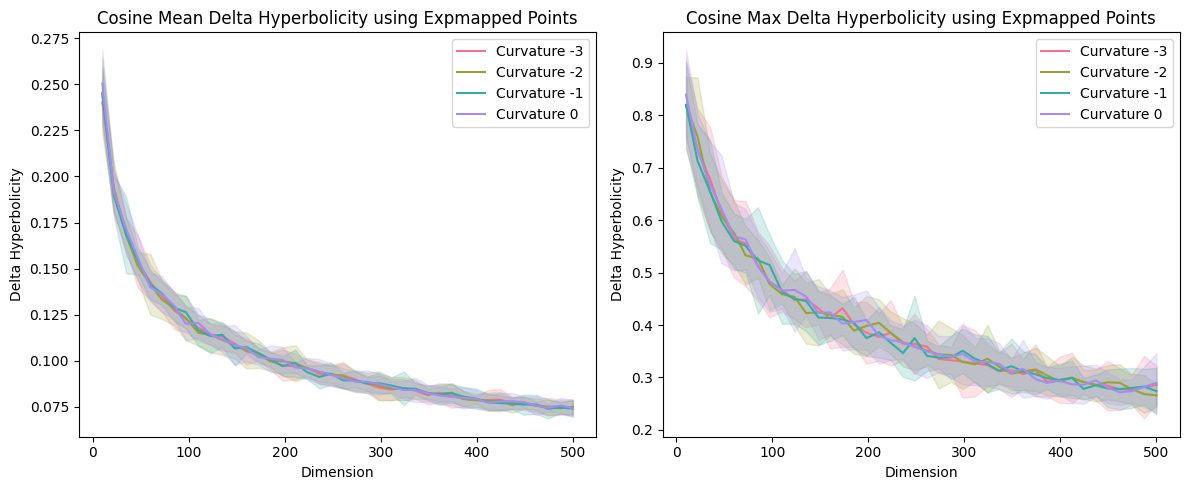

In [12]:
# Parameters
dims = np.linspace(10, 500, 40, dtype=int).tolist()
curvatures = [-3, -2, -1, 0]
n_samples = 10  # Number of samples for confidence intervals
N_POINTS = 100  # Number of points to generate for each sample

# Initialize arrays to store results
delta_means_samples = [[] for _ in curvatures]
delta_maxes_samples = [[] for _ in curvatures]

for i, k in enumerate(curvatures):
    for dim in dims:
        # Store results for multiple samples
        sample_means = []
        sample_maxes = []
        
        for _ in range(n_samples):
            # Create a single point in tangent space
            N = torch.distributions.MultivariateNormal(
                loc=torch.zeros(dim), 
                covariance_matrix=torch.eye(dim)
            )
            x = N.sample(sample_shape=(N_POINTS,))
            x_tangent = torch.hstack([torch.zeros(N_POINTS, 1), x])
            
            # Create manifold and compute distances
            pm = ProductManifold(signature=[(k, dim)])
            X = pm.expmap(x_tangent).to('cuda')
            # Use cosine distance instead of Euclidean
            dists = cosine_distance(X)
            delta = delta_hyperbolicity(dists)
            
            sample_means.append(torch.abs(delta).mean().item())
            sample_maxes.append(delta.max().item())
        
        # Calculate mean and std for confidence intervals
        delta_means_samples[i].append((np.mean(sample_means), np.std(sample_means)))
        delta_maxes_samples[i].append((np.mean(sample_maxes), np.std(sample_maxes)))
    print(f"Curvature {k} done")

# Create the plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

colors = sns.color_palette("husl", len(curvatures))

for i, k in enumerate(curvatures):
    # Extract means and stds
    means = [m[0] for m in delta_means_samples[i]]
    mean_stds = [m[1] for m in delta_means_samples[i]]
    maxes = [m[0] for m in delta_maxes_samples[i]]
    max_stds = [m[1] for m in delta_maxes_samples[i]]
    
    # Plot means with confidence intervals
    axs[0].plot(dims, means, label=f'Curvature {k}', color=colors[i])
    axs[0].fill_between(dims, 
                       [m - 1.96*s for m,s in zip(means, mean_stds)],
                       [m + 1.96*s for m,s in zip(means, mean_stds)],
                       alpha=0.2, color=colors[i])
    
    # Plot maxes with confidence intervals
    axs[1].plot(dims, maxes, label=f'Curvature {k}', color=colors[i])
    axs[1].fill_between(dims,
                       [m - 1.96*s for m,s in zip(maxes, max_stds)],
                       [m + 1.96*s for m,s in zip(maxes, max_stds)],
                       alpha=0.2, color=colors[i])

axs[0].legend()
axs[0].set_xlabel('Dimension')
axs[0].set_ylabel('Delta Hyperbolicity')
axs[0].set_title('Cosine Mean Delta Hyperbolicity using Expmapped Points')
axs[1].legend()
axs[1].set_xlabel('Dimension')
axs[1].set_ylabel('Delta Hyperbolicity')
axs[1].set_title('Cosine Max Delta Hyperbolicity using Expmapped Points')

plt.tight_layout()
plt.show()

Curvature -3 done for LP=1
Curvature -2 done for LP=1
Curvature -1 done for LP=1
Curvature 0 done for LP=1
Curvature -3 done for LP=2
Curvature -2 done for LP=2
Curvature -1 done for LP=2
Curvature 0 done for LP=2
Curvature -3 done for LP=4
Curvature -2 done for LP=4
Curvature -1 done for LP=4
Curvature 0 done for LP=4
Curvature -3 done for LP=inf
Curvature -2 done for LP=inf
Curvature -1 done for LP=inf
Curvature 0 done for LP=inf


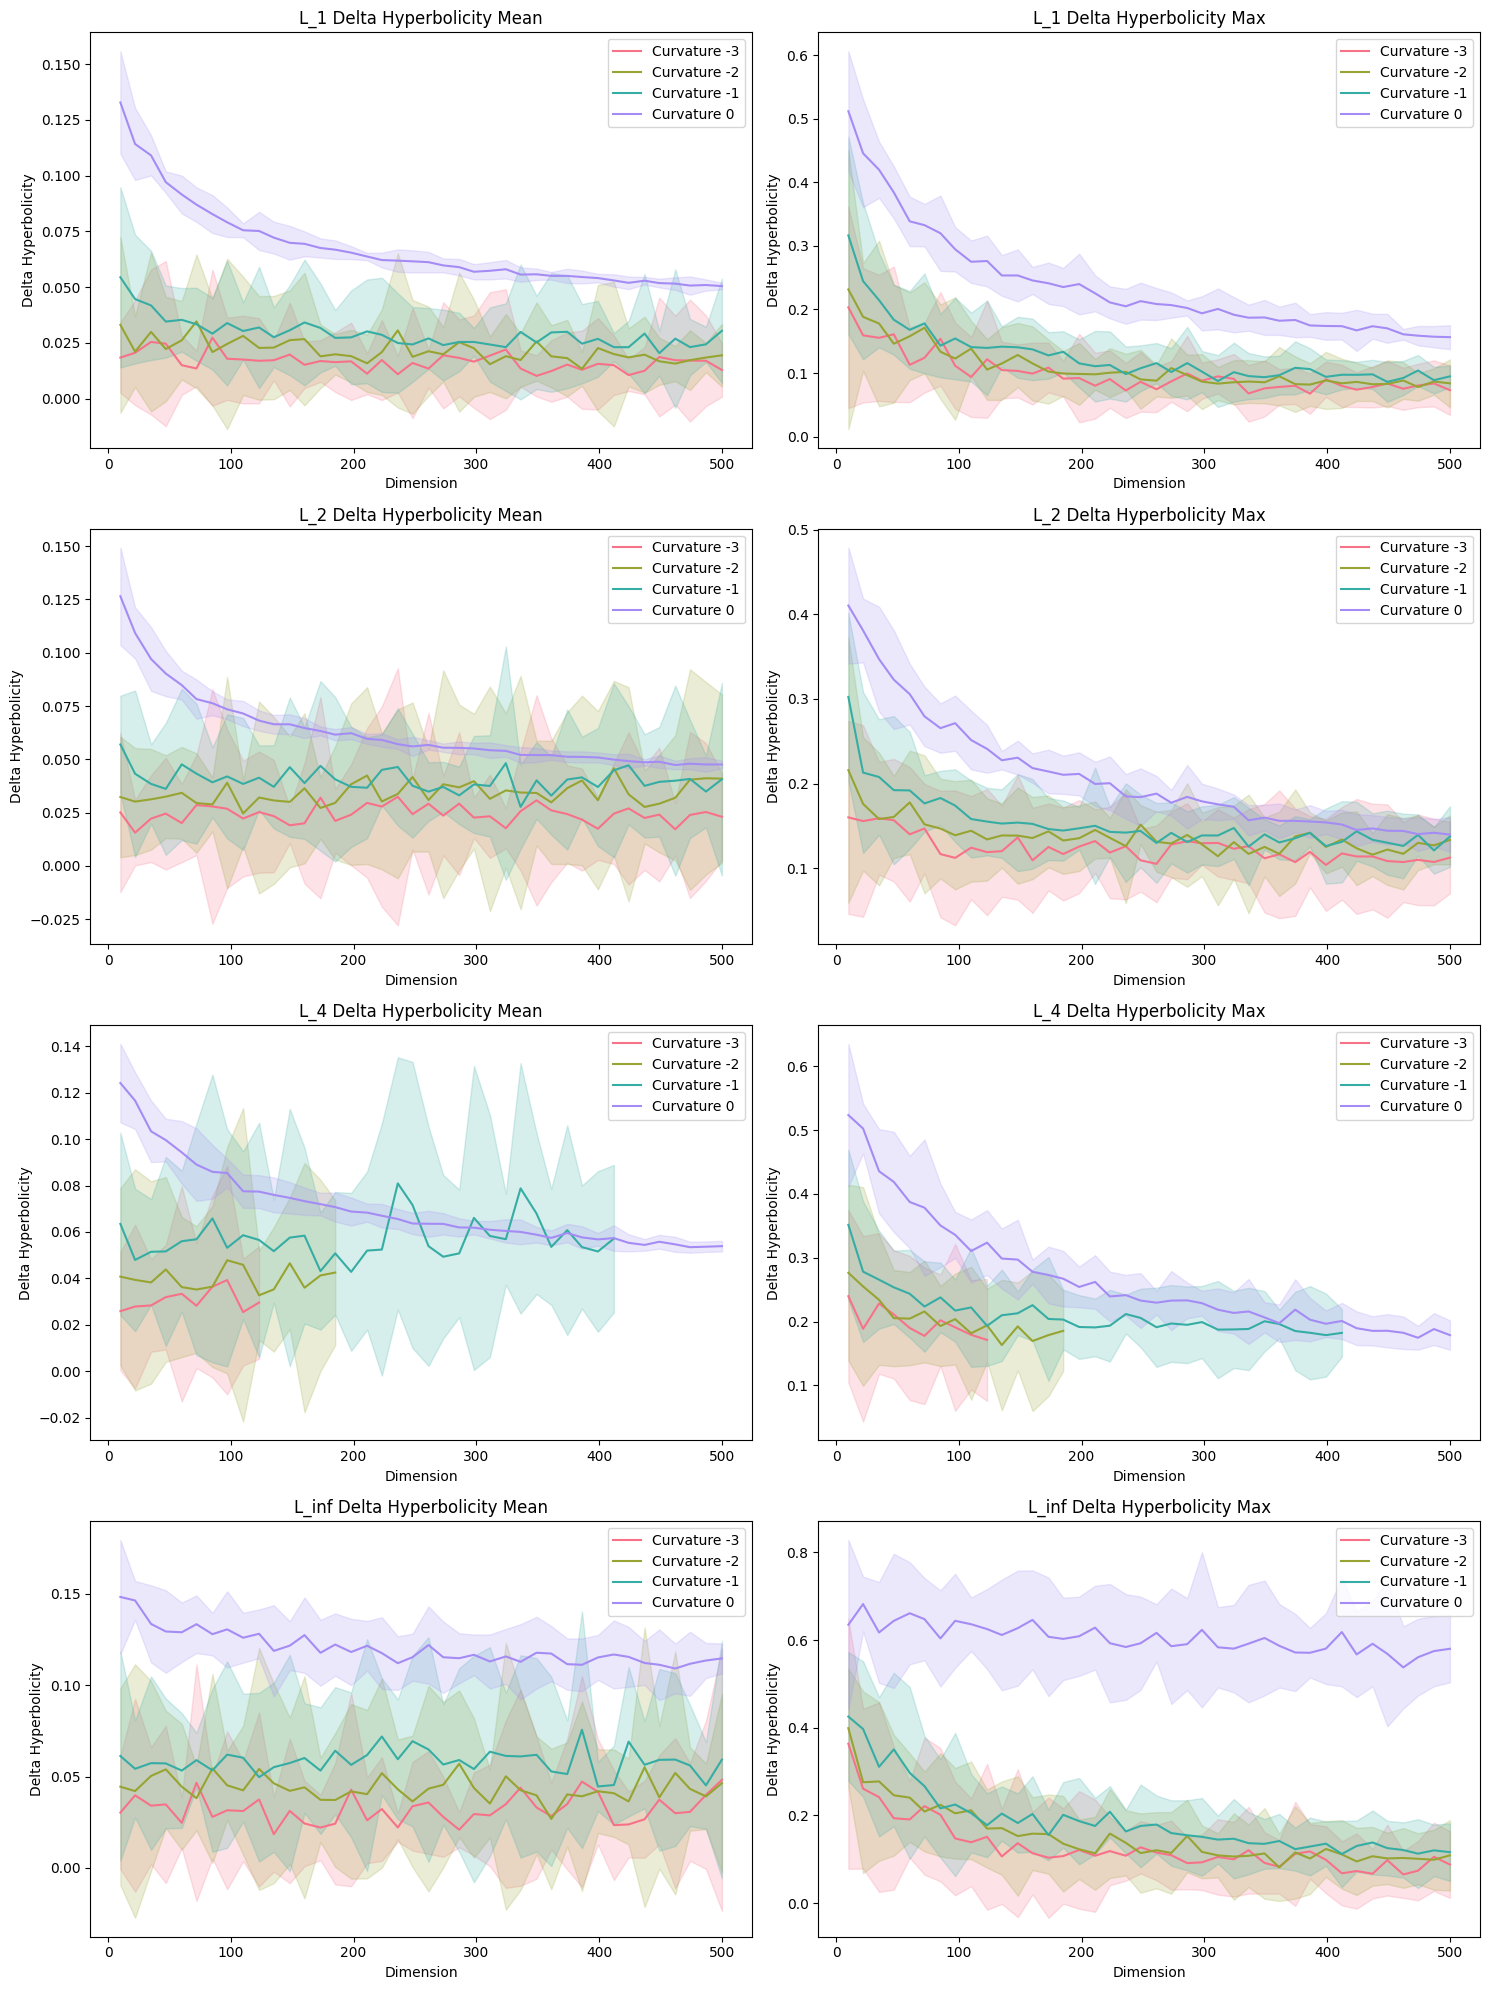

In [13]:
# Parameters
LPs = [1, 2, 4, float('inf')]  # Different LP norms to test
dims = np.linspace(10, 500, 40, dtype=int).tolist()
curvatures = [-3, -2, -1, 0]
n_samples = 10  # Number of samples for confidence intervals
N_POINTS = 100  # Number of points to generate for each sample

# Create a figure with subplots for each LP norm
fig, axs = plt.subplots(len(LPs), 2, figsize=(15, 5*len(LPs)))

for lp_idx, LP in enumerate(LPs):
    # Initialize arrays to store all samples
    delta_means_samples = [[] for _ in curvatures]
    delta_maxes_samples = [[] for _ in curvatures]

    for i, k in enumerate(curvatures):
        for dim in dims:
            # Store results for multiple samples
            sample_means = []
            sample_maxes = []
            
            for _ in range(n_samples):
                # Create a single point in tangent space
                N = torch.distributions.MultivariateNormal(
                    loc=torch.zeros(dim), 
                    covariance_matrix=torch.eye(dim)
                )
                x = N.sample(sample_shape=(N_POINTS,))
                x_tangent = torch.hstack([torch.zeros(N_POINTS, 1), x])
                
                # Create manifold and compute distances
                pm = ProductManifold(signature=[(k, dim)])
                X = pm.expmap(x_tangent).to('cuda')
                dists = torch.cdist(X, X, p=LP)
                delta = delta_hyperbolicity(dists)
                
                sample_means.append(torch.abs(delta).mean().item())
                sample_maxes.append(delta.max().item())
            
            # Calculate mean and std for confidence intervals
            delta_means_samples[i].append((np.mean(sample_means), np.std(sample_means)))
            delta_maxes_samples[i].append((np.mean(sample_maxes), np.std(sample_maxes)))
        print(f"Curvature {k} done for LP={LP}")

    # Plot for this LP norm
    colors = sns.color_palette("husl", len(curvatures))
    
    for i, k in enumerate(curvatures):
        # Extract means and stds
        means = [m[0] for m in delta_means_samples[i]]
        mean_stds = [m[1] for m in delta_means_samples[i]]
        maxes = [m[0] for m in delta_maxes_samples[i]]
        max_stds = [m[1] for m in delta_maxes_samples[i]]
        
        # Plot means with confidence intervals
        axs[lp_idx, 0].plot(dims, means, label=f'Curvature {k}', color=colors[i])
        axs[lp_idx, 0].fill_between(dims, 
                                   [m - 1.96*s for m,s in zip(means, mean_stds)],
                                   [m + 1.96*s for m,s in zip(means, mean_stds)],
                                   alpha=0.2, color=colors[i])
        
        # Plot maxes with confidence intervals
        axs[lp_idx, 1].plot(dims, maxes, label=f'Curvature {k}', color=colors[i])
        axs[lp_idx, 1].fill_between(dims,
                                   [m - 1.96*s for m,s in zip(maxes, max_stds)],
                                   [m + 1.96*s for m,s in zip(maxes, max_stds)],
                                   alpha=0.2, color=colors[i])

    # Set labels and titles for this LP norm
    axs[lp_idx, 0].legend()
    axs[lp_idx, 0].set_xlabel('Dimension')
    axs[lp_idx, 0].set_ylabel('Delta Hyperbolicity')
    axs[lp_idx, 0].set_title(f'L_{LP} Delta Hyperbolicity Mean')
    
    axs[lp_idx, 1].legend()
    axs[lp_idx, 1].set_xlabel('Dimension')
    axs[lp_idx, 1].set_ylabel('Delta Hyperbolicity')
    axs[lp_idx, 1].set_title(f'L_{LP} Delta Hyperbolicity Max')

plt.tight_layout()
plt.show()

Curvature -3 done
Curvature -2 done
Curvature -1 done
Curvature 0 done


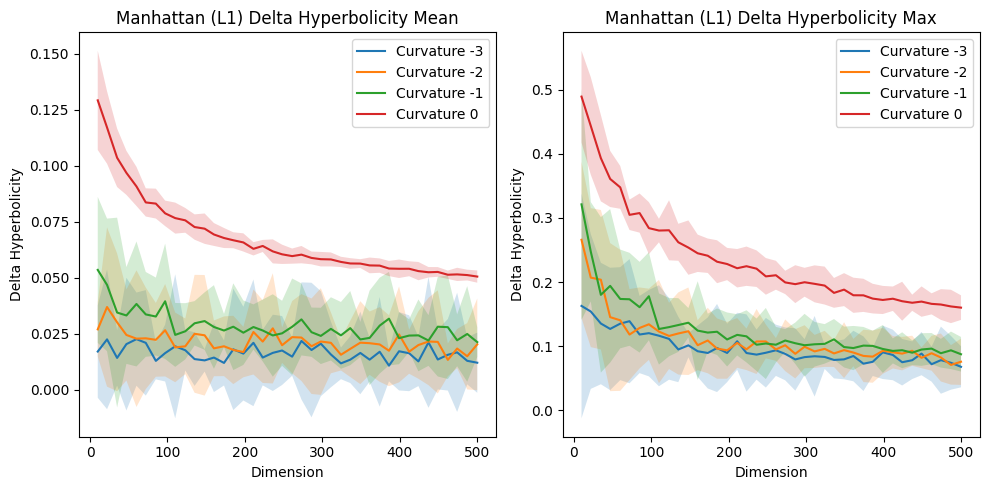

In [16]:
# Curvatures and Dimension in Manhattan (L1) distance metrics

LPs = [1, 2, 8, float('inf')]

N = 100  # Number of points per sample
n_samples = 10  # Number of samples for confidence intervals

dims = np.linspace(10,500,40, dtype=int).tolist()
curvatures = [-3, -2, -1, 0]

# Initialize arrays to store all samples
delta_means_samples = [[] for _ in curvatures]
delta_maxes_samples = [[] for _ in curvatures]

for i,k in enumerate(curvatures):
    for dim in dims:
        # Store results for multiple samples
        sample_means = []
        sample_maxes = []
        
        for _ in range(n_samples):
            pm = ProductManifold(signature=[(k, dim)], device='cuda')
            X, _ = pm.sample(z_mean=torch.stack([pm.mu0] * N))
            dists = torch.cdist(X, X, p=1)
            delta = delta_hyperbolicity(dists)
            sample_means.append(torch.abs(delta).mean().item())
            sample_maxes.append(delta.max().item())
        
        # Calculate mean and std for confidence intervals
        delta_means_samples[i].append((np.mean(sample_means), np.std(sample_means)))
        delta_maxes_samples[i].append((np.mean(sample_maxes), np.std(sample_maxes)))
    print(f"Curvature {k} done")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i,k in enumerate(curvatures):
    # Extract means and stds
    means = [m[0] for m in delta_means_samples[i]]
    mean_stds = [m[1] for m in delta_means_samples[i]]
    maxes = [m[0] for m in delta_maxes_samples[i]]
    max_stds = [m[1] for m in delta_maxes_samples[i]]
    
    # Plot means with confidence intervals
    axs[0].plot(dims, means, label=f'Curvature {k}')
    axs[0].fill_between(dims, 
                       [m - 1.96*s for m,s in zip(means, mean_stds)],
                       [m + 1.96*s for m,s in zip(means, mean_stds)],
                       alpha=0.2)
    
    # Plot maxes with confidence intervals
    axs[1].plot(dims, maxes, label=f'Curvature {k}')
    axs[1].fill_between(dims,
                       [m - 1.96*s for m,s in zip(maxes, max_stds)],
                       [m + 1.96*s for m,s in zip(maxes, max_stds)],
                       alpha=0.2)

axs[0].legend()
axs[0].set_xlabel('Dimension')
axs[0].set_ylabel('Delta Hyperbolicity')
axs[0].set_title('Manhattan (L1) Delta Hyperbolicity Mean')
axs[1].legend()
axs[1].set_xlabel('Dimension')
axs[1].set_ylabel('Delta Hyperbolicity')
axs[1].set_title('Manhattan (L1) Delta Hyperbolicity Max')

plt.tight_layout()
plt.show() 

/home/dylan/.local/lib/python3.10/site-packages/torch/distributions/wishart.py:275: UserWarning: Singular sample detected.
  warnings.warn("Singular sample detected.")


-0.0011660244781523943
0.1867714375257492


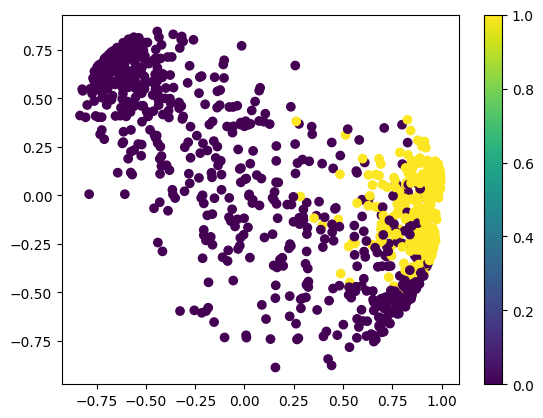

In [19]:
n_samples = 100

pm = ProductManifold(signature=[(-1, 2)])
X, Y = pm.gaussian_mixture()
dists = torch.cdist(X, X, p=1)
delta = delta_hyperbolicity(dists)
print(delta.mean().item())
print(delta.max().item())

pm_stereo, x_stereo = pm.stereographic(X) # Convert manifold to poincare ball, and convert X to poincare coordinates
x_stereo = x_stereo.detach().cpu().numpy()

plt.scatter(x_stereo[:, 0], x_stereo[:, 1], c=Y, cmap='viridis')
plt.colorbar()
plt.show()

In [20]:
# Curvatures and Dimension in Euclidean distance metrics
N = 100  # Number of points per sample
n_samples = 10  # Number of samples for confidence intervals

dims = np.linspace(10,500,40, dtype=int).tolist()
curvatures = [-3, -2, -1, 0]

# Initialize arrays to store all samples
delta_means_samples = [[] for _ in curvatures]
delta_maxes_samples = [[] for _ in curvatures]

for i,k in enumerate(curvatures):
    for dim in dims:
        # Store results for multiple samples
        sample_means = []
        sample_maxes = []
        
        for _ in range(n_samples):
            pm = ProductManifold(signature=[(-1, 2)], is_stereographic=True)
            X, Y = pm.gaussian_mixture()
            dists = torch.cdist(X, X)
            delta = delta_hyperbolicity(dists)
            sample_means.append(torch.abs(delta).mean().item())
            sample_maxes.append(delta.max().item())
        
        # Calculate mean and std for confidence intervals
        delta_means_samples[i].append((np.mean(sample_means), np.std(sample_means)))
        delta_maxes_samples[i].append((np.mean(sample_maxes), np.std(sample_maxes)))
    print(f"Curvature {k} done")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i,k in enumerate(curvatures):
    # Extract means and stds
    means = [m[0] for m in delta_means_samples[i]]
    mean_stds = [m[1] for m in delta_means_samples[i]]
    maxes = [m[0] for m in delta_maxes_samples[i]]
    max_stds = [m[1] for m in delta_maxes_samples[i]]
    
    # Plot means with confidence intervals
    axs[0].plot(dims, means, label=f'Curvature {k}')
    axs[0].fill_between(dims, 
                       [m - 1.96*s for m,s in zip(means, mean_stds)],
                       [m + 1.96*s for m,s in zip(means, mean_stds)],
                       alpha=0.2)
    
    # Plot maxes with confidence intervals
    axs[1].plot(dims, maxes, label=f'Curvature {k}')
    axs[1].fill_between(dims,
                       [m - 1.96*s for m,s in zip(maxes, max_stds)],
                       [m + 1.96*s for m,s in zip(maxes, max_stds)],
                       alpha=0.2)

axs[0].legend()
axs[0].set_xlabel('Dimension')
axs[0].set_ylabel('Delta Hyperbolicity')
axs[0].set_title('Euclidean Delta Hyperbolicity Mean')
axs[1].legend()
axs[1].set_xlabel('Dimension')
axs[1].set_ylabel('Delta Hyperbolicity')
axs[1].set_title('Euclidean Delta Hyperbolicity Max')

plt.tight_layout()
plt.show() 

TypeError: ProductManifold.__init__() got an unexpected keyword argument 'is_stereographic'